In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-list/flipkart_products_20250405.csv


In [2]:
df = pd.read_csv('/kaggle/input/flipkart-product-list/flipkart_products_20250405.csv')

In [3]:
df

,Product Name,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Main Category,Sub Category,Discount (%),Seller,Return Policy,Product URL
0,Krishnamurthy-Devan Laboriosam Ultra Smartphon...,142247.04,3.2,7348,4812,364,Electronics,Smartphones,45,RetailNet,False,https://www.flipkart.com/Krishnamurthy-Devan-L...
1,Nanda-Mahal Dignissimos Lite Laptops 1,186922.43,4.1,2342,881,145,Electronics,Laptops,55,Flipkart Assured,False,https://www.flipkart.com/Nanda-Mahal-Dignissim...
2,Choudhury LLC Amet Plus Decor 15,11843.41,5.0,739,2580,206,Home,Decor,58,SuperComNet,True,https://www.flipkart.com/Choudhury-LLC-Amet-Pl...
3,Borah LLC Accusantium Lite Smartphones 9,10864.31,4.8,1543,4562,1585,Electronics,Smartphones,0,ElectroWorld,False,https://www.flipkart.com/Borah-LLC-Accusantium...
4,Murty Inc Placeat Pro Smartwatches 8,32950.41,4.5,7702,4925,1064,Electronics,Smartwatches,18,MobileHub,False,https://www.flipkart.com/Murty-Inc-Placeat-Pro...
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Sampath-Sama Repellat Pro T-Shirts 11,1620.65,4.9,568,5322,2126,Fashion,T-Shirts,9,RetailNet,False,https://www.flipkart.com/Sampath-Sama-Repellat...
4996,"Sekhon, Sachdeva and Chakrabarti Hic Plus Shoe...",18414.64,4.4,9103,7361,3133,Fashion,Shoes,44,ElectroWorld,False,"https://www.flipkart.com/Sekhon,-Sachdeva-and-..."
4997,"Mittal, Sinha and Kumer Asperiores Lite Washin...",24841.94,3.1,6124,4164,900,Appliances,Washing Machines,8,SuperComNet,False,"https://www.flipkart.com/Mittal,-Sinha-and-Kum..."
4998,Suresh Ltd Voluptatibus Plus Furniture 13,25177.89,3.4,4536,1645,414,Home,Furniture,0,MobileHub,True,https://www.flipkart.com/Suresh-Ltd-Voluptatib...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      5000 non-null   object 
 1   Price (₹)         5000 non-null   float64
 2   Rating (★)        5000 non-null   float64
 3   Number of Buyers  5000 non-null   int64  
 4   Total Sold        5000 non-null   int64  
 5   Available Stock   5000 non-null   int64  
 6   Main Category     5000 non-null   object 
 7   Sub Category      5000 non-null   object 
 8   Discount (%)      5000 non-null   int64  
 9   Seller            5000 non-null   object 
 10  Return Policy     5000 non-null   bool   
 11  Product URL       5000 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 434.7+ KB


In [5]:
df.describe()

,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Discount (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35884.094350,4.003640,5044.425600,5005.066200,1250.870200,26.208000
std,39867.681428,0.584742,2886.016013,2897.042048,1109.872427,23.484332
min,100.450000,3.000000,11.000000,50.000000,0.000000,0.000000
25%,12275.502500,3.500000,2553.750000,2495.000000,323.750000,0.000000
50%,27761.010000,4.000000,5099.500000,4972.500000,916.000000,23.000000
75%,42852.247500,4.500000,7575.500000,7571.500000,1934.250000,47.000000
max,249158.910000,5.000000,10000.000000,10000.000000,4924.000000,70.000000


# VIZUALIZATION 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns

Index(['Product Name', 'Price (₹)', 'Rating (★)', 'Number of Buyers',
       'Total Sold', 'Available Stock', 'Main Category', 'Sub Category',
       'Discount (%)', 'Seller', 'Return Policy', 'Product URL'],
      dtype='object')

In [8]:
cols = ['Product Name', 'Price (₹)', 'Rating (★)', 'Number of Buyers',
       'Total Sold', 'Available Stock', 'Main Category', 'Sub Category',
       'Discount (%)', 'Seller', 'Return Policy', 'Product URL']

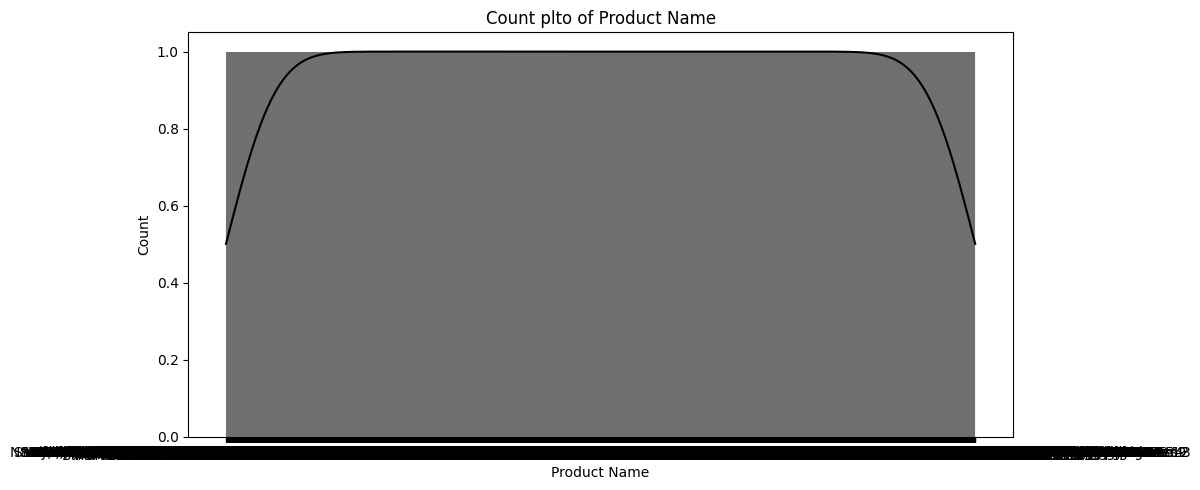

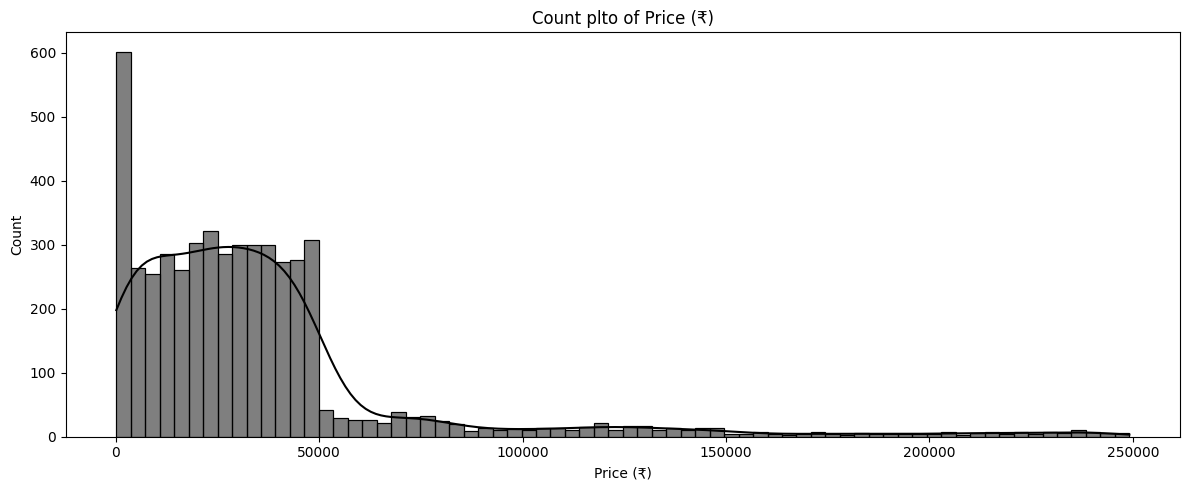

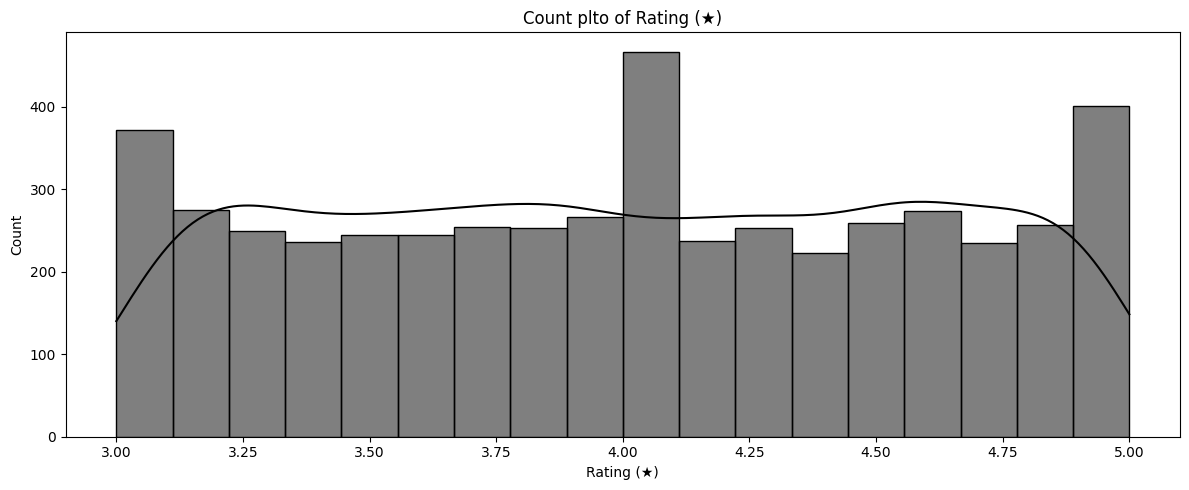

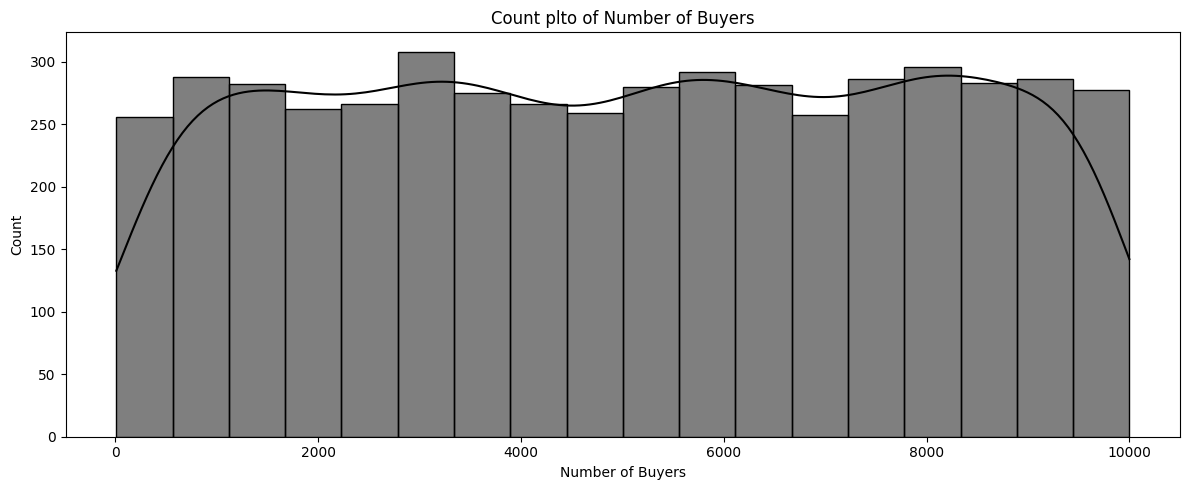

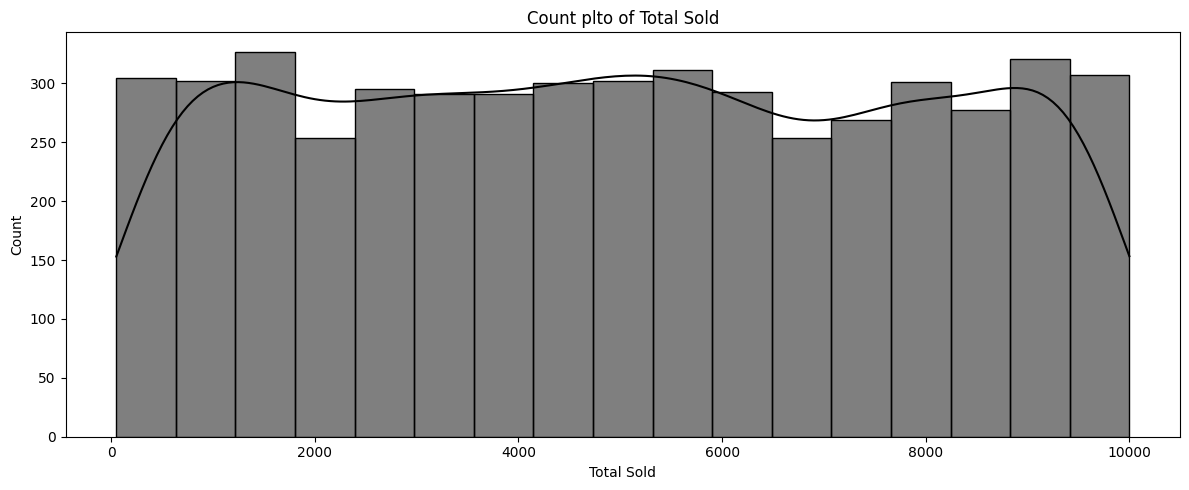

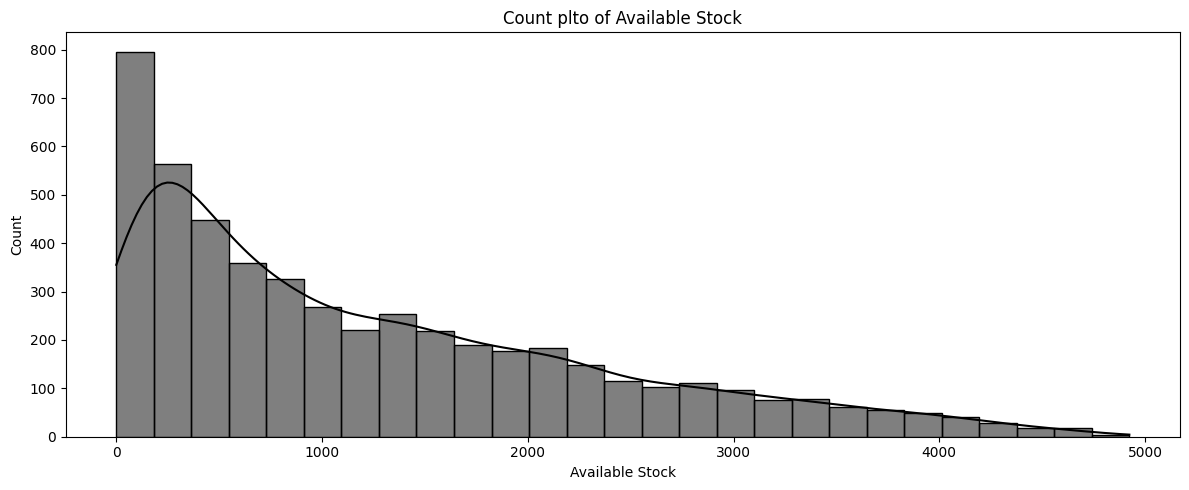

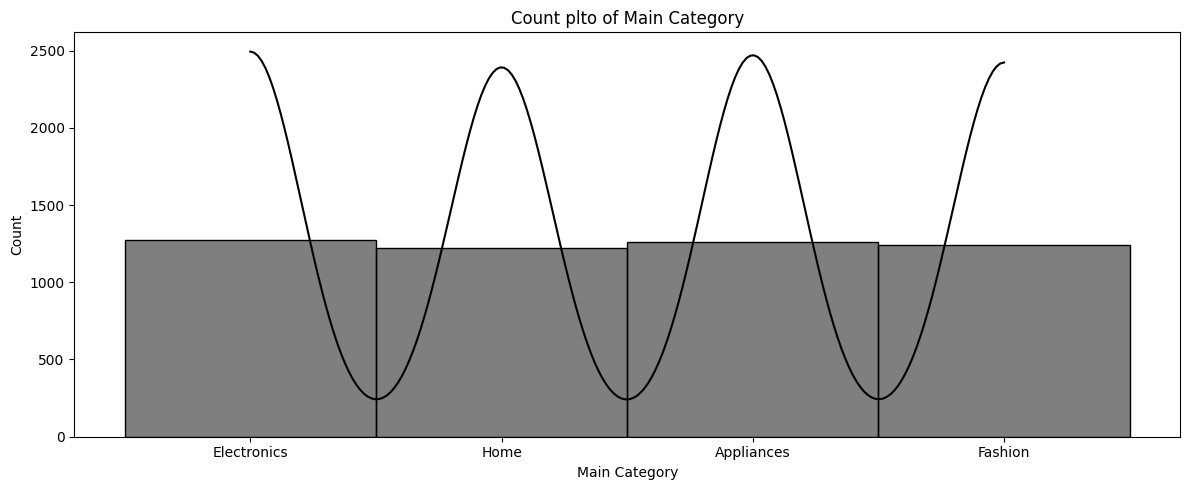

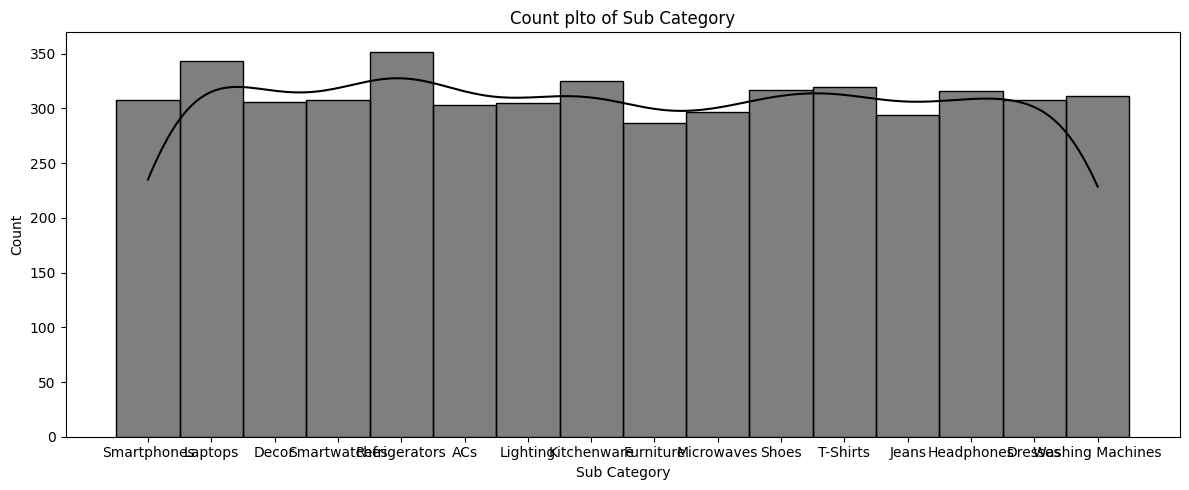

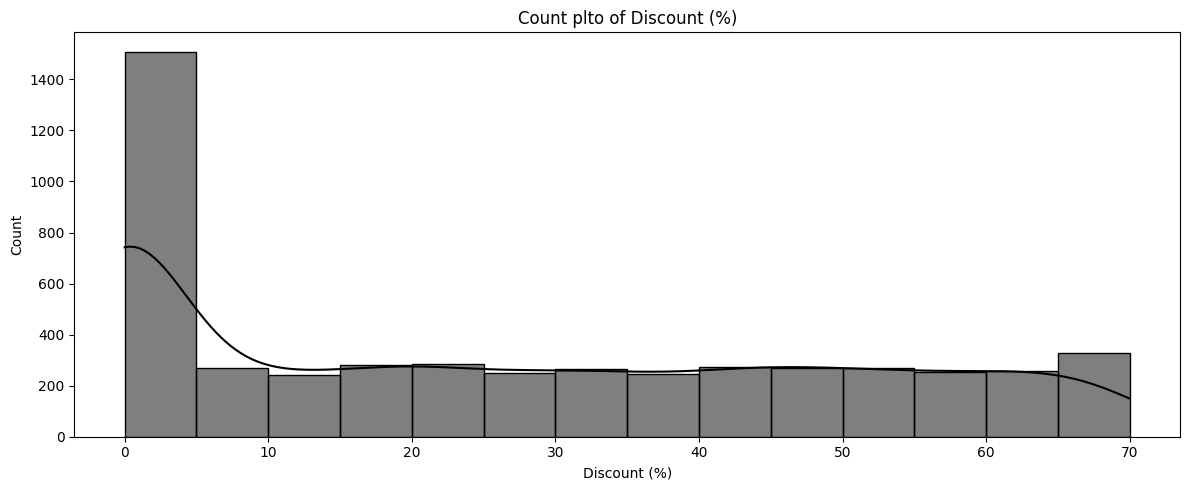

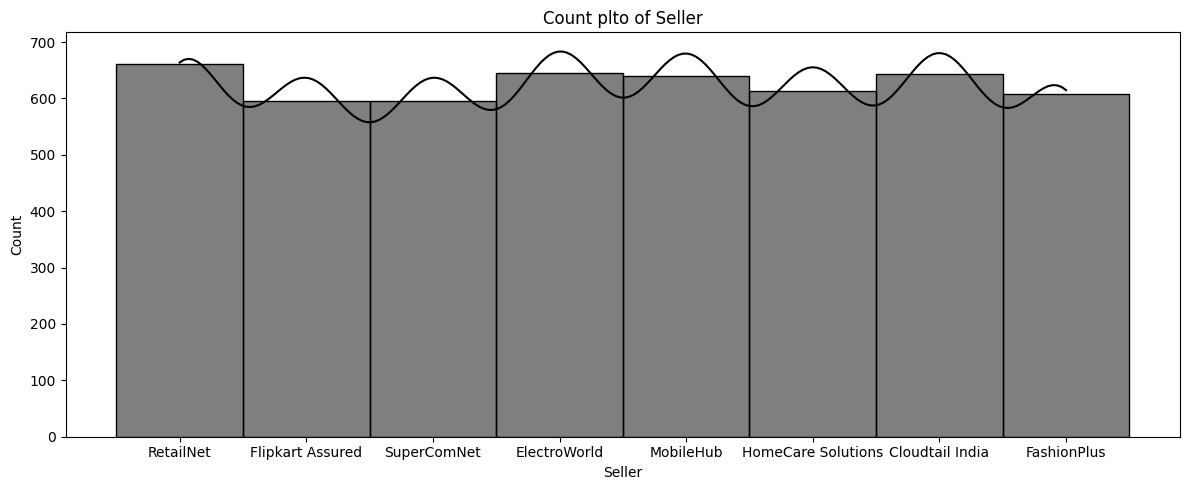

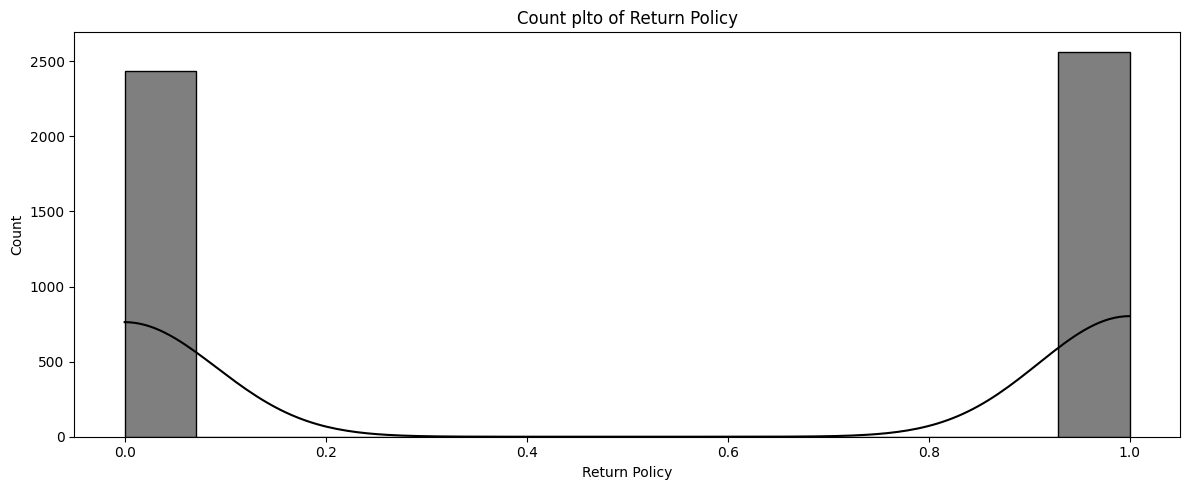

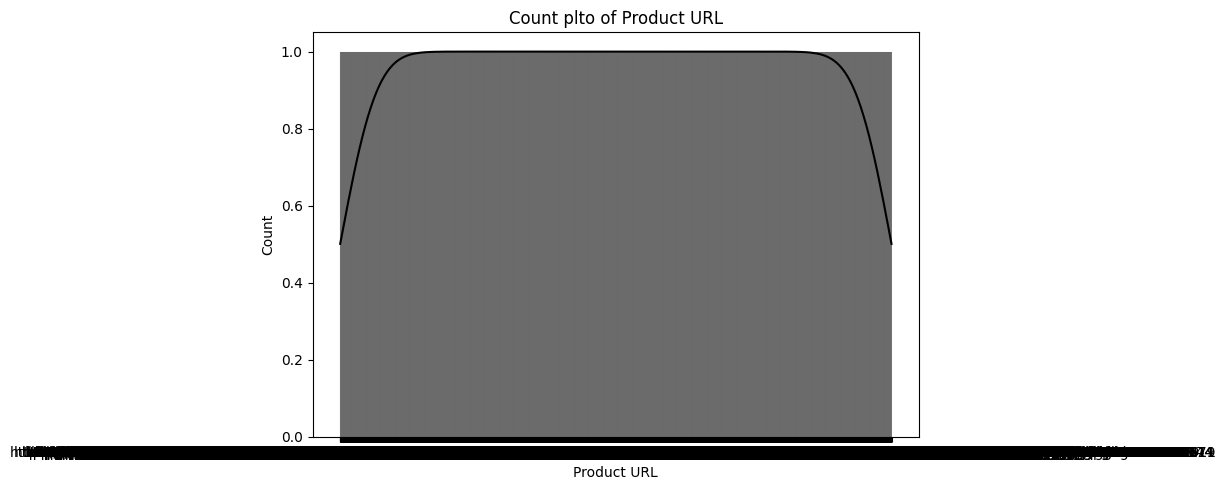

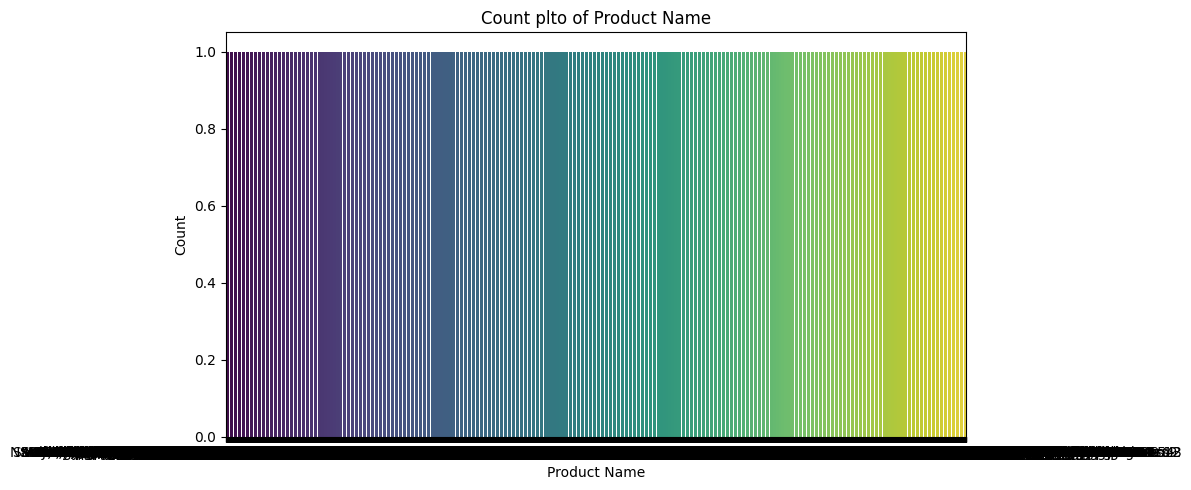

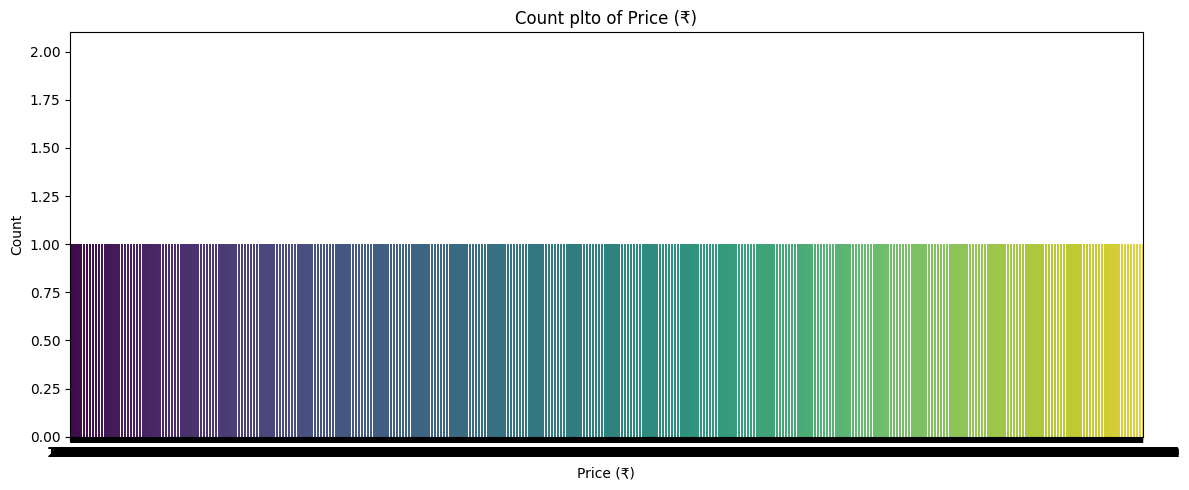

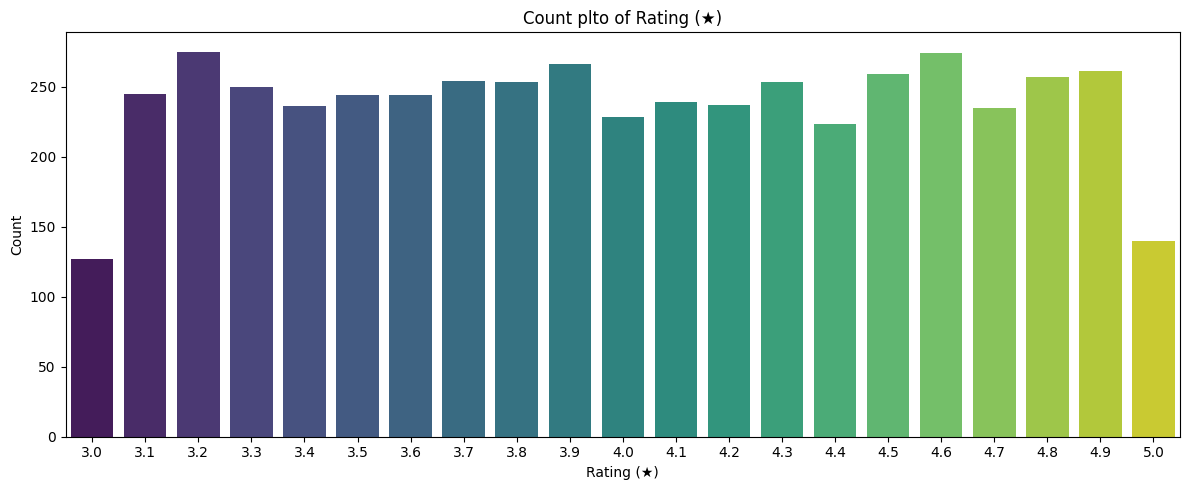

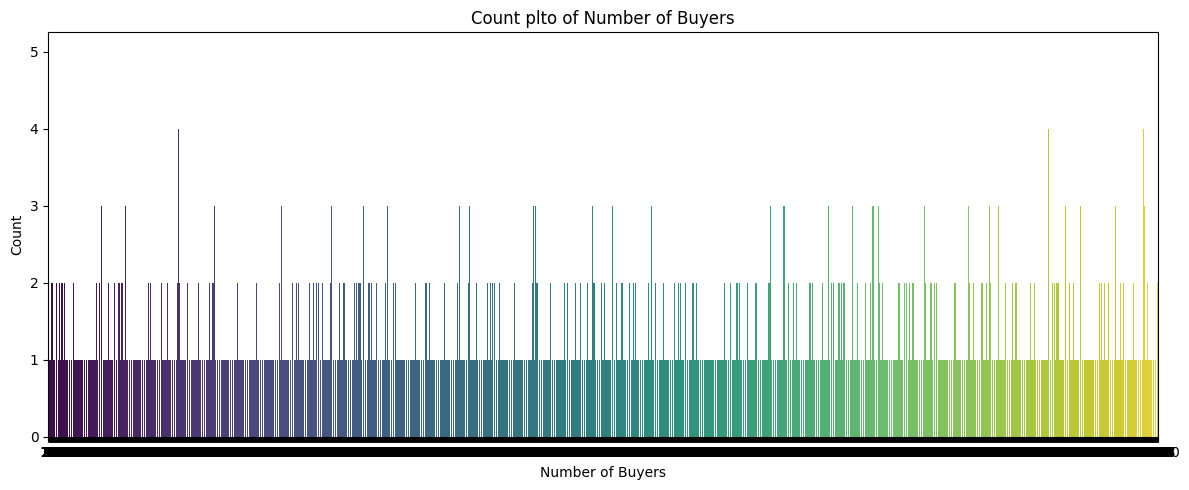

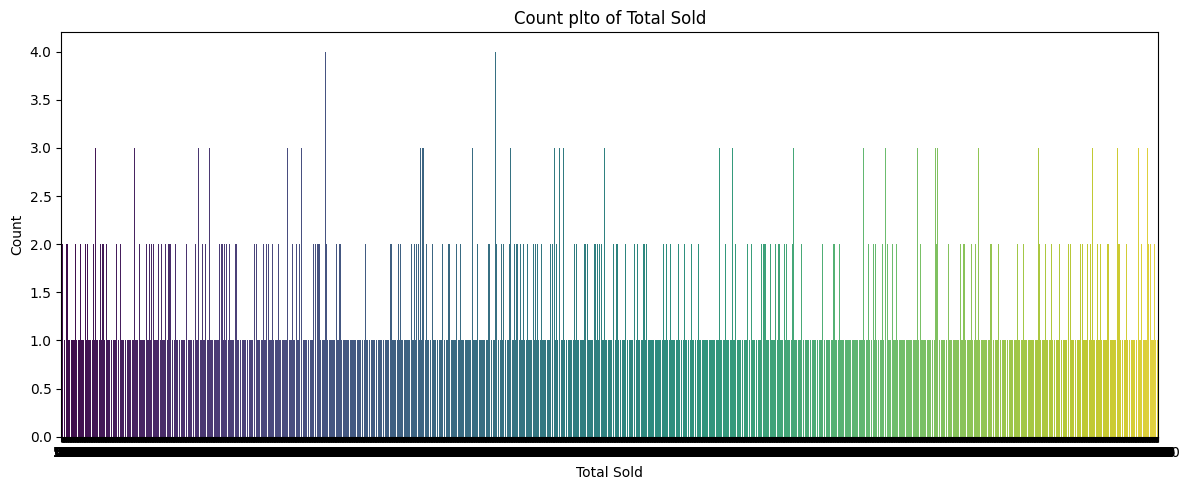

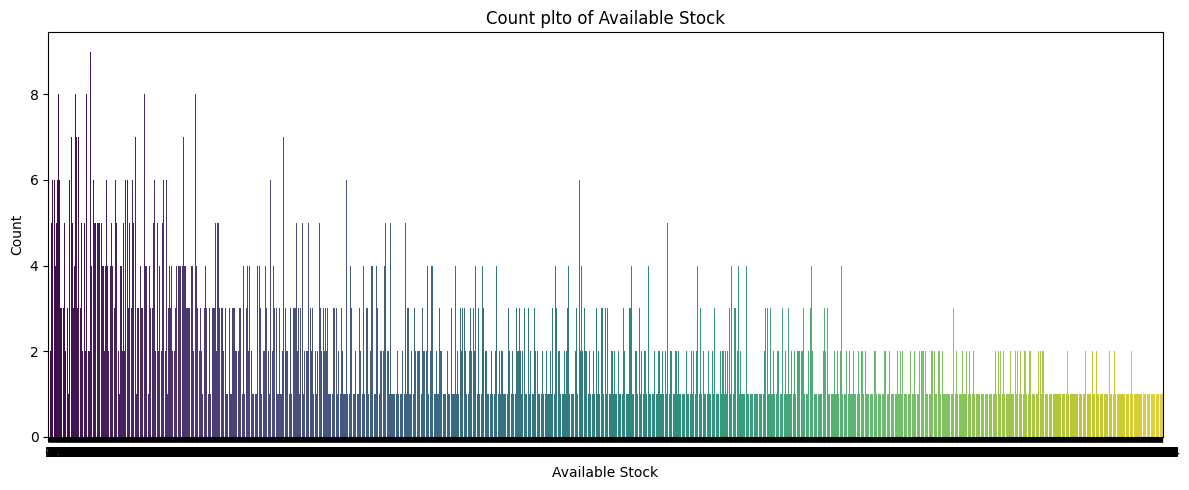

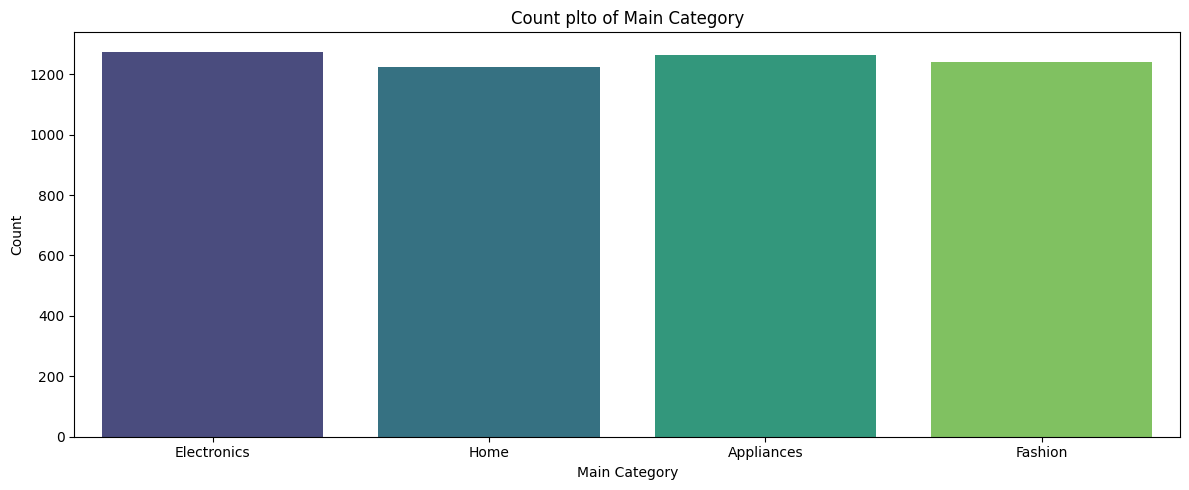

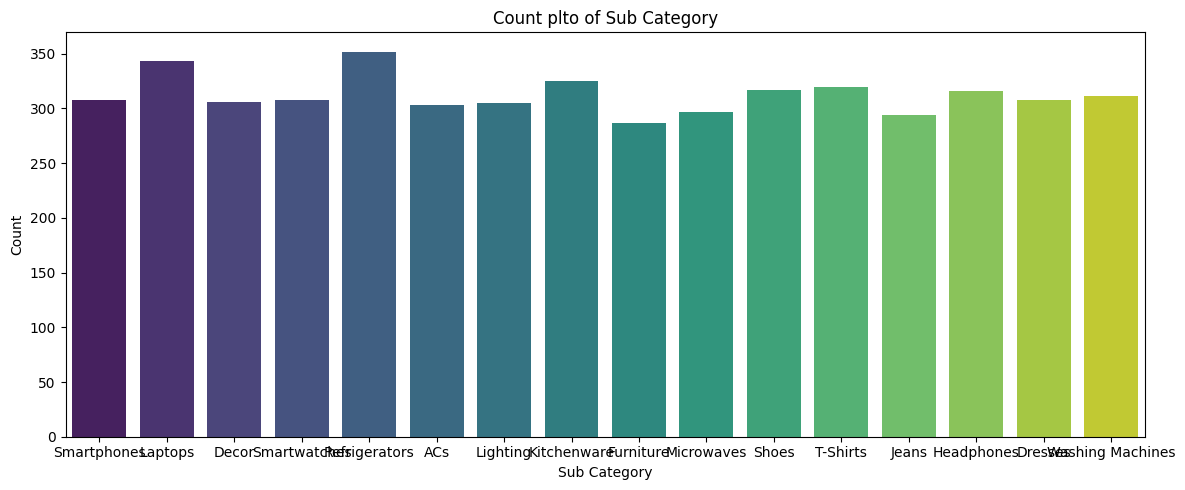

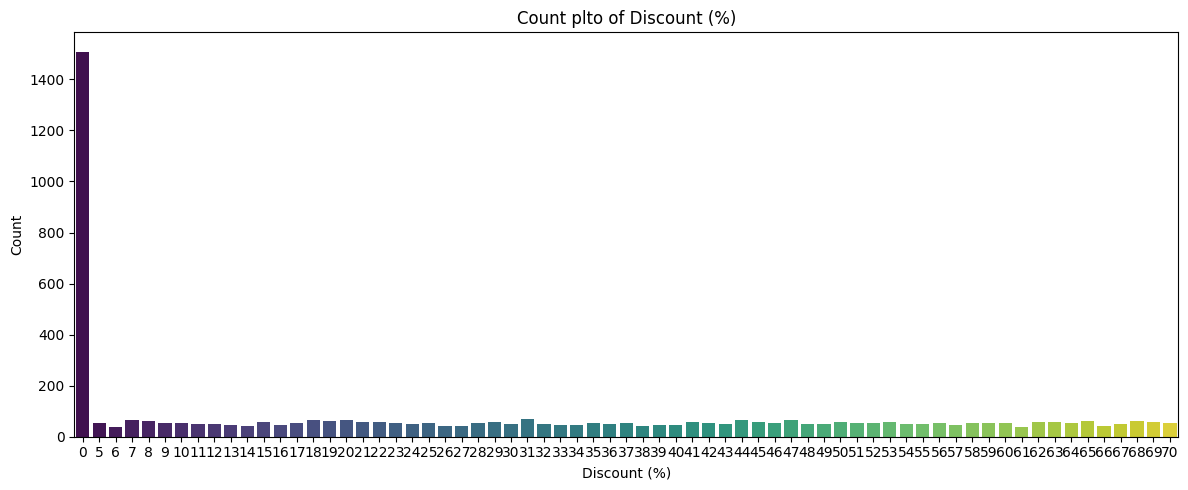

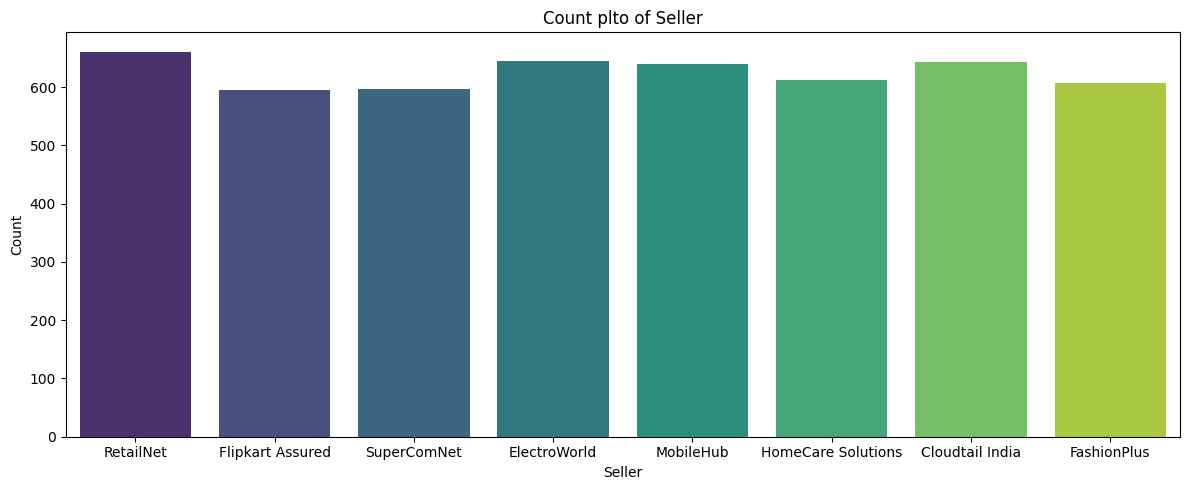

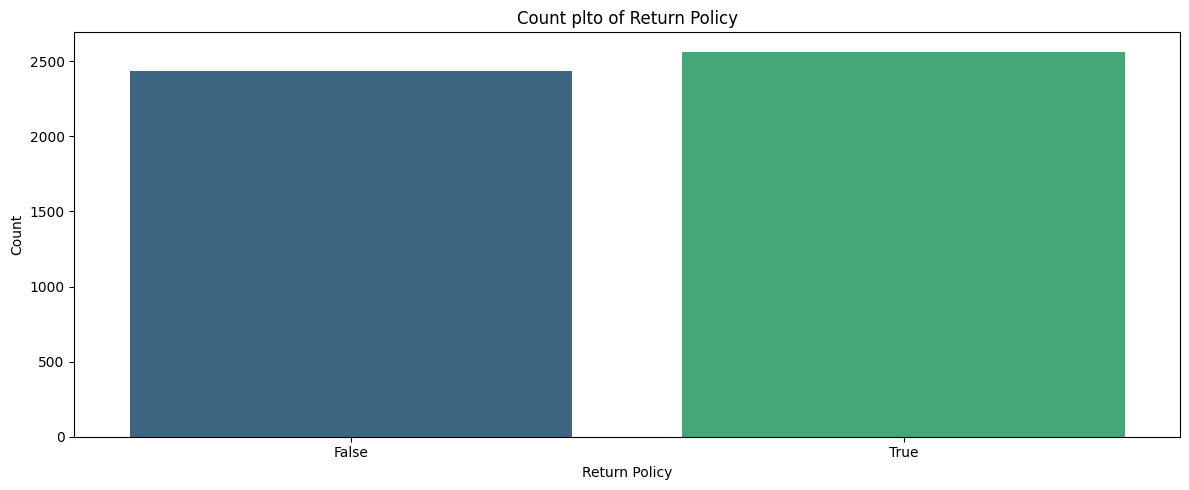

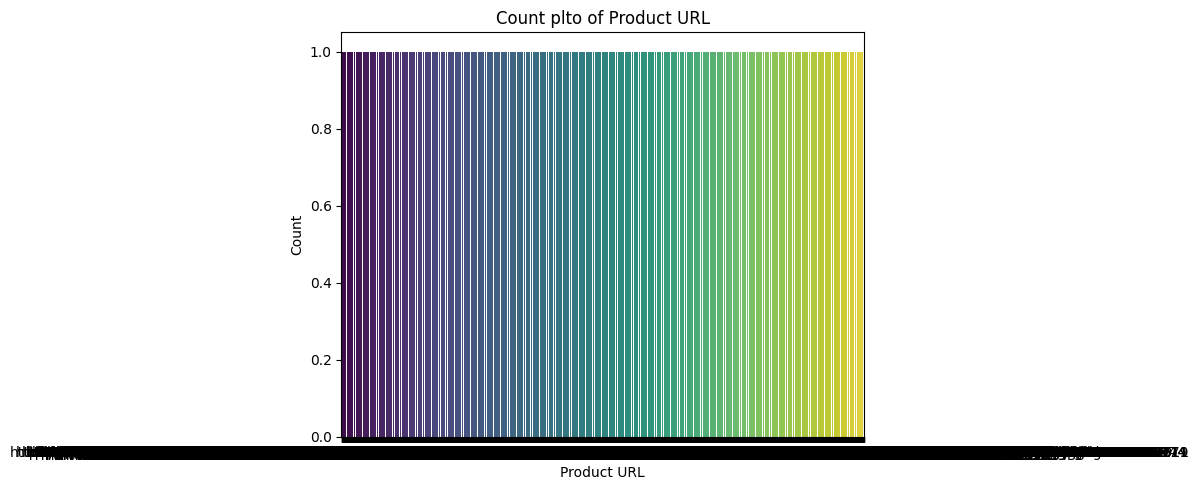

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(df[features].dropna(),kde=True,color='black')
        plt.title(f'Count plto of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(x=features,data=df,palette='viridis')
        plt.title(f'Count plto of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()